In [1]:
!pip install librosa tensorflow pandas numpy scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load data
df = pd.read_csv("C:/Users/ASUS/Desktop/augmented_features_original.csv", header=None)

# Separate labels and features
labels = df.iloc[:, 0]
features = df.iloc[:, 1:]

# Reshape features to [samples, height, width, channels]
num_mfcc = 13  # Number of MFCC coefficients
max_pad_len = 100  # Time steps
features = np.array(features).reshape(-1, num_mfcc, max_pad_len, 1)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)  # One-hot encode the labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(num_mfcc, max_pad_len, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Experiment with higher dropout
    Dense(64, activation='relu'),  # Adding another dense layer
    Dropout(0.3), 
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\ASUS\PycharmProjects\voicemodel\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 11, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 5, 49, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 47, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 23, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1472)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         188,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,266 (844.79 KB)

 Trainable params: 216,266 (844.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.1001 - loss: 8.0416 - val_accuracy: 0.1361 - val_loss: 2.2924
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1300 - loss: 2.2998 - val_accuracy: 0.1512 - val_loss: 2.2490
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1622 - loss: 2.2375 - val_accuracy: 0.2098 - val_loss: 2.1464
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1665 - loss: 2.2030 - val_accuracy: 0.2457 - val_loss: 2.0499
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2320 - loss: 2.0674 - val_accuracy: 0.3119 - val_loss: 1.9509
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2855 - loss: 1.9580 - val_accuracy: 0.3932 - val_loss: 1.7735
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3308 - loss: 1.8544 - val_accuracy: 0.4102 - val_loss: 1.7013
Epoch 8/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3853 - loss: 1.7503 - val_accuracy: 0.4594 - v

In [5]:
# Save the model as an HDF5 file
model.save("audio_cnn_model3.h5")
print("Model saved as audio_cnn_model3.h5")

Model saved as audio_cnn_model3.h5


In [6]:
!pip install sounddevice librosa

In [8]:
import sounddevice as sd
import numpy as np

# Test recording and playback
sampling_rate = 22050  # Hz
duration = 2  # seconds

print("Recording test audio...")
audio = sd.rec(int(duration * sampling_rate), samplerate=sampling_rate, channels=1, dtype='float32')
sd.wait()  # Wait until recording is complete
print("Recording complete. Playing back audio...")

# Play back the recorded audio
sd.play(audio, samplerate=sampling_rate)
sd.wait()  # Wait until playback is complete

Recording test audio...
Recording complete. Playing back audio...


In [9]:
import librosa

def extract_mfcc_features(audio, sampling_rate, n_mfcc=13, max_pad_len=100):
    # Extract MFCC features from the recorded audio
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=n_mfcc)
    
    # Pad or truncate to ensure consistent shape
    if mfccs.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]
        
    # Reshape for model input (1, n_mfcc, max_pad_len, 1)
    mfccs = mfccs.reshape(1, n_mfcc, max_pad_len, 1)
    return mfccs

In [10]:
import os
print(os.listdir())  # This will list all files in the current directory

['.idea', '.ipynb_checkpoints', 'a.ipynb', 'audio_cnn_model.h5', 'audio_cnn_model1.h5', 'audio_cnn_model2.h5', 'audio_cnn_model3.h5', 'convert M4A to WAV.py', 'edc.py', 'er.py', 'erds.py', 'ewsd.py', 'extraction.py', 'extraction_new.py', 'features_with_labels.csv', 'feature_extraction.py', 'feature_extraction2.py', 'feature_extration_working.py', 'label_encoder.pkl', 'main.py', 'normalize.py', 'original_aug.py', 'preprocess.py', 'train.ipynb', 'train_new.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'Untitled7.ipynb', 'venv', 'voice_recognition_cnn.h5', 'voice_recognition_cnn.keras', 'w.py', 'x.py', 'x1.py']


In [11]:
import sounddevice as sd
import numpy as np

# Settings
sampling_rate = 22050  # Match this with the model’s training sampling rate
duration = 2  # Duration for recording in seconds

def record_audio(duration=2, fs=22050):
    print("Recording...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float32')
    sd.wait()  # Wait until recording is complete
    print("Recording complete.")
    return audio.flatten()

In [12]:
import sounddevice as sd
import numpy as np

# Settings
sampling_rate = 22050  # Match this with the model’s training sampling rate
duration = 2  # Duration for recording in seconds

def record_audio(duration=2, fs=22050):
    print("Recording...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float32')
    sd.wait()  # Wait until recording is complete
    print("Recording complete.")
    return audio.flatten()

In [14]:
import sounddevice as sd
import numpy as np

# Test recording and playback
sampling_rate = 22050  # Hz
duration = 2  # seconds

print("Recording test audio...")
audio = sd.rec(int(duration * sampling_rate), samplerate=sampling_rate, channels=1, dtype='float32')
sd.wait()  # Wait until recording is complete
print("Recording complete. Playing back audio...")

# Play back the recorded audio
sd.play(audio, samplerate=sampling_rate)
sd.wait()  # Wait until playback is complete

Recording test audio...
Recording complete. Playing back audio...


In [15]:
import librosa

def extract_mfcc_features(audio, sampling_rate, n_mfcc=13, max_pad_len=100):
    # Extract MFCC features from the recorded audio
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=n_mfcc)
    
    # Pad or truncate to ensure consistent shape
    if mfccs.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]
        
    # Reshape for model input (1, n_mfcc, max_pad_len, 1)
    mfccs = mfccs.reshape(1, n_mfcc, max_pad_len, 1)
    return mfccs

In [16]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("audio_cnn_model3.h5")
print("Model loaded successfully.")

Model loaded successfully.


In [17]:
from sklearn.preprocessing import LabelEncoder

# Load label encoder or define classes if needed
classes = ['Achchi', 'Amma', 'Ayya', 'kala', 'Mala','Malli','Tharuwa','Thaththa','Wathura','Yathura']  # Replace with actual class labels
label_encoder = LabelEncoder()
label_encoder.fit(classes)  # This should match the labels used in training

def predict_audio():
    # Step 1: Record audio
    audio = record_audio(duration, sampling_rate)
    
    # Step 2: Extract MFCC features
    mfcc_features = extract_mfcc_features(audio, sampling_rate)
    
    # Step 3: Make a prediction
    prediction = model.predict(mfcc_features)
    predicted_class = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    
    # Step 4: Get the confidence score (percentage match)
    confidence = prediction[0][predicted_class] * 100
    
    # Step 5: Display the result
    print(f"Predicted word: {predicted_label}")
    print(f"Confidence: {confidence:.2f}%")

In [18]:
def predict_audio():
    """
    Records audio, extracts features, makes a prediction, and displays the result.
    """
    # Parameters
    duration = 3  # Duration of audio in seconds
    sampling_rate = 16000  # Sampling rate (common for speech processing)

    # Step 1: Record the audio
    audio = record_audio(duration, sampling_rate)

    # Step 2: Extract MFCC features from the recorded audio
    mfcc_features = extract_mfcc_features(audio, sampling_rate)

    # Step 3: Make the prediction using the trained model
    prediction = model.predict(mfcc_features)  # Model should be a trained classifier (e.g., CNN)
    
    # Debugging output
    print("Raw prediction probabilities:", prediction)
    
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability
    print(f"Predicted class index: {predicted_class}")

    # Step 4: Decode the predicted class index to the actual class label
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]  # Get the label
    print(f"Predicted label: {predicted_label}")

    # Step 5: Get the confidence score
    confidence = prediction[0][predicted_class] * 100

    # Step 6: Display the result
    print(f"Predicted word: {predicted_label}")
    print(f"Confidence: {confidence:.2f}%")


In [22]:
# Run real-time prediction
predict_audio()


Recording...
Recording complete.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Raw prediction probabilities: [[0.21118894 0.02935481 0.19065517 0.17495774 0.02377539 0.14177953
  0.04144973 0.07008296 0.08294616 0.03380956]]
Predicted class index: 0
Predicted label: Achchi
Predicted word: Achchi
Confidence: 21.12%


In [25]:
from IPython.display import FileLink

# Create a downloadable link for the saved model file
FileLink(r'audio_cnn_model3.h5')

C:\Users\ASUS\PycharmProjects\voicemodel\audio_cnn_model3.h5

In [26]:
from tensorflow.keras.callbacks import Callback

class TestAccuracyCallback(Callback):
    def __init__(self, test_data):
        super(TestAccuracyCallback, self).__init__()
        self.X_test, self.y_test = test_data
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        # Evaluate on the test data at the end of each epoch
        test_loss, test_acc = self.model.evaluate(self.X_test, self.y_test, verbose=0)
        self.test_accuracy.append(test_acc)
        print(f"Epoch {epoch + 1}: Test Accuracy = {test_acc}")

# Create an instance of the callback with your test data
test_accuracy_callback = TestAccuracyCallback((X_test, y_test))


In [27]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy}")


Training Accuracy: 0.9763705134391785


In [30]:
pip install matplotlib


  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 578.7 kB/s eta 0:00:03
   --------- ------------------------------ 0.5/2.2 MB 578.7 kB/s eta 0:00:03
   -------------- ------------------------- 0.8/2.2 MB 657.8 kB/s eta 0:00:03
   -------------- 

In [33]:
import numpy as np

# Convert one-hot encoded labels to class indices
y_train = np.argmax(y_train, axis=-1)
y_test = np.argmax(y_test, axis=-1)

# Recompile the model with sparse_categorical_crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Now train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9048 - loss: 0.3001 - val_accuracy: 0.8715 - val_loss: 0.5599
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8801 - loss: 0.3378 - val_accuracy: 0.8544 - val_loss: 0.5589
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9009 - loss: 0.3104 - val_accuracy: 0.8318 - val_loss: 0.6942
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8915 - loss: 0.2946 - val_accuracy: 0.8677 - val_loss: 0.4908
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9133 - loss: 0.2564 - val_accuracy: 0.8733 - val_loss: 0.5207
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9108 - loss: 0.2340 - val_accuracy: 0.8639 - val_loss: 0.5168
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9250 - loss: 0.2238 - val_accuracy: 0.8639 - val_loss: 0.4407
Epoch 8/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9368 - loss: 0.1914 - val_accuracy: 0.8715 - v

In [34]:
!pip install sounddevice librosa

In [35]:
# Save the model as an HDF5 file
model.save("audio_cnn_model4.h5")
print("Model saved as audio_cnn_model4.h5")

Model saved as audio_cnn_model4.h5


In [36]:
import os
print(os.listdir())  # This will list all files in the current directory

['.idea', '.ipynb_checkpoints', 'a.ipynb', 'audio_cnn_model.h5', 'audio_cnn_model1.h5', 'audio_cnn_model2.h5', 'audio_cnn_model3.h5', 'audio_cnn_model4.h5', 'convert M4A to WAV.py', 'edc.py', 'er.py', 'erds.py', 'ewsd.py', 'extraction.py', 'extraction_new.py', 'features_with_labels.csv', 'feature_extraction.py', 'feature_extraction2.py', 'feature_extration_working.py', 'label_encoder.pkl', 'main.py', 'normalize.py', 'original_aug.py', 'preprocess.py', 'train.ipynb', 'train_new.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'Untitled7.ipynb', 'venv', 'voice_recognition_cnn.h5', 'voice_recognition_cnn.keras', 'w.py', 'x.py', 'x1.py']


In [37]:
import sounddevice as sd
import numpy as np

# Settings
sampling_rate = 22050  # Match this with the model’s training sampling rate
duration = 2  # Duration for recording in seconds

def record_audio(duration=2, fs=22050):
    print("Recording...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float32')
    sd.wait()  # Wait until recording is complete
    print("Recording complete.")
    return audio.flatten()

In [38]:
import sounddevice as sd
import numpy as np

# Settings
sampling_rate = 22050  # Match this with the model’s training sampling rate
duration = 2  # Duration for recording in seconds

def record_audio(duration=2, fs=22050):
    print("Recording...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float32')
    sd.wait()  # Wait until recording is complete
    print("Recording complete.")
    return audio.flatten()

In [39]:
import sounddevice as sd
import numpy as np

# Test recording and playback
sampling_rate = 22050  # Hz
duration = 2  # seconds

print("Recording test audio...")
audio = sd.rec(int(duration * sampling_rate), samplerate=sampling_rate, channels=1, dtype='float32')
sd.wait()  # Wait until recording is complete
print("Recording complete. Playing back audio...")

# Play back the recorded audio
sd.play(audio, samplerate=sampling_rate)
sd.wait()  # Wait until playback is complete

Recording test audio...
Recording complete. Playing back audio...


In [40]:
import librosa

def extract_mfcc_features(audio, sampling_rate, n_mfcc=13, max_pad_len=100):
    # Extract MFCC features from the recorded audio
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=n_mfcc)
    
    # Pad or truncate to ensure consistent shape
    if mfccs.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]
        
    # Reshape for model input (1, n_mfcc, max_pad_len, 1)
    mfccs = mfccs.reshape(1, n_mfcc, max_pad_len, 1)
    return mfccs

In [41]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("audio_cnn_model4.h5")
print("Model loaded successfully.")

Model loaded successfully.


In [42]:
from sklearn.preprocessing import LabelEncoder

# Load label encoder or define classes if needed
classes = ['Achchi', 'Amma', 'Ayya', 'kala', 'Mala','Malli','Tharuwa','Thaththa','Wathura','Yathura']  # Replace with actual class labels
label_encoder = LabelEncoder()
label_encoder.fit(classes)  # This should match the labels used in training

def predict_audio():
    # Step 1: Record audio
    audio = record_audio(duration, sampling_rate)
    
    # Step 2: Extract MFCC features
    mfcc_features = extract_mfcc_features(audio, sampling_rate)
    
    # Step 3: Make a prediction
    prediction = model.predict(mfcc_features)
    predicted_class = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    
    # Step 4: Get the confidence score (percentage match)
    confidence = prediction[0][predicted_class] * 100
    
    # Step 5: Display the result
    print(f"Predicted word: {predicted_label}")
    print(f"Confidence: {confidence:.2f}%")

In [43]:
def predict_audio():
    """
    Records audio, extracts features, makes a prediction, and displays the result.
    """
    # Parameters
    duration = 3  # Duration of audio in seconds
    sampling_rate = 16000  # Sampling rate (common for speech processing)

    # Step 1: Record the audio
    audio = record_audio(duration, sampling_rate)

    # Step 2: Extract MFCC features from the recorded audio
    mfcc_features = extract_mfcc_features(audio, sampling_rate)

    # Step 3: Make the prediction using the trained model
    prediction = model.predict(mfcc_features)  # Model should be a trained classifier (e.g., CNN)
    
    # Debugging output
    print("Raw prediction probabilities:", prediction)
    
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability
    print(f"Predicted class index: {predicted_class}")

    # Step 4: Decode the predicted class index to the actual class label
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]  # Get the label
    print(f"Predicted label: {predicted_label}")

    # Step 5: Get the confidence score
    confidence = prediction[0][predicted_class] * 100

    # Step 6: Display the result
    print(f"Predicted word: {predicted_label}")
    print(f"Confidence: {confidence:.2f}%")


In [44]:
# Run real-time prediction
predict_audio()


Recording...
Recording complete.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Raw prediction probabilities: [[1.7813463e-03 7.4833614e-04 6.1241984e-03 9.4639534e-01 1.6572736e-03
  1.5769804e-02 3.8922317e-03 1.6194279e-03 1.6457149e-03 2.0366397e-02]]
Predicted class index: 3
Predicted label: Mala
Predicted word: Mala
Confidence: 94.64%


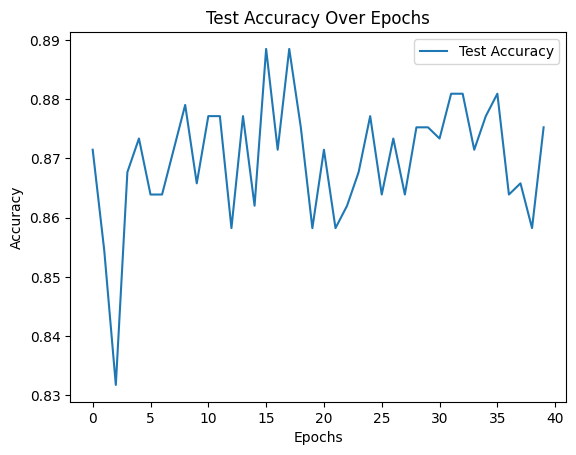

In [45]:
import matplotlib.pyplot as plt

# Extract the validation accuracy (test accuracy) from the history object
val_accuracy = history.history['val_accuracy']

# Plot the accuracy curve on test data (validation accuracy)
plt.plot(val_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()
plt.show()


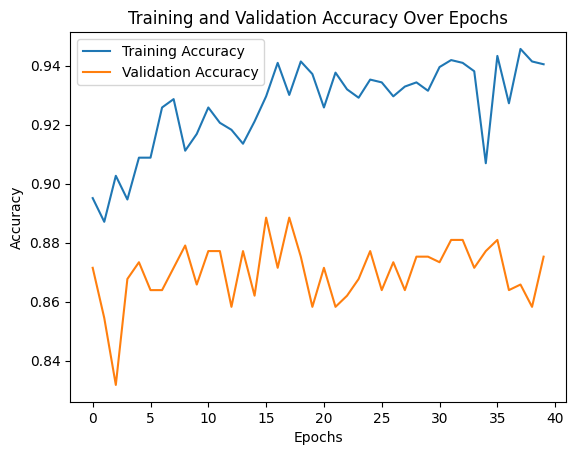

In [46]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot both training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


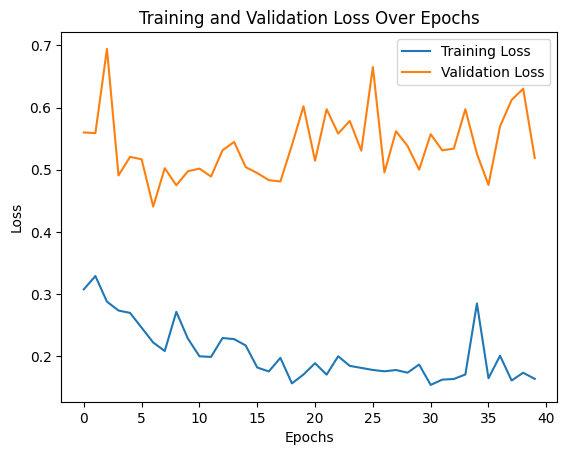

In [47]:
import matplotlib.pyplot as plt

# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot both training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Get the model's predictions on the test set
# If using a classification model that outputs probabilities (e.g., softmax), use argmax to get the predicted class
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 2: Convert the true labels to class indices (if not already in integer format)
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(len(np.unique(y_true))), yticklabels=np.arange(len(np.unique(y_true))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [49]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


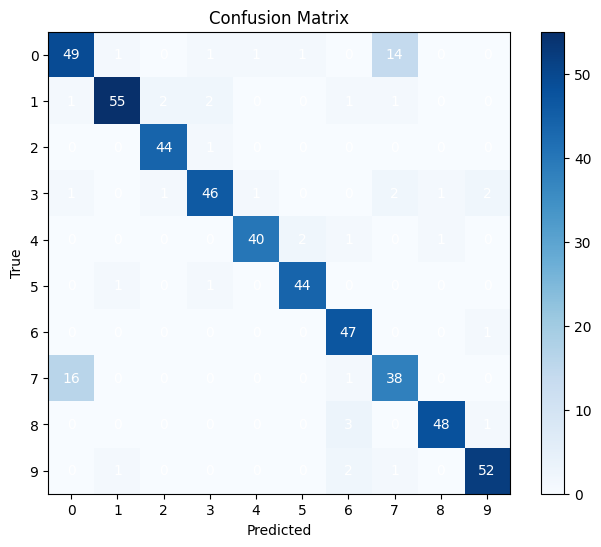

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 2: Convert the true labels to class indices (if not already in integer format)
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Plot the confusion matrix using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_true)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

# Add labels and annotations
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()


In [51]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Step 1: Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 2: Convert the true labels to class indices (if not already in integer format)
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Step 3: Calculate Precision, Recall, and F1-Score for each class
precision = precision_score(y_true, y_pred_classes, average=None)
recall = recall_score(y_true, y_pred_classes, average=None)
f1 = f1_score(y_true, y_pred_classes, average=None)

# Step 4: Print or display the results in a table
# Optionally, print a classification report (which includes precision, recall, and f1-score)
print(classification_report(y_true, y_pred_classes))

# You can also display these metrics in a structured table format
import pandas as pd

# Create a DataFrame to display Precision, Recall, and F1 scores
metrics_df = pd.DataFrame({
    'Class': np.unique(y_true),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print(metrics_df)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        67
           1       0.95      0.89      0.92        62
           2       0.94      0.98      0.96        45
           3       0.90      0.85      0.88        54
           4       0.95      0.91      0.93        44
           5       0.94      0.96      0.95        46
           6       0.85      0.98      0.91        48
           7       0.68      0.69      0.68        55
           8       0.96      0.92      0.94        52
           9       0.93      0.93      0.93        56

    accuracy                           0.88       529
   macro avg       0.88      0.88      0.88       529
weighted avg       0.88      0.88      0.88       529

   Class  Precision    Recall  F1-Score
0      0   0.731343  0.731343  0.731343
1      1   0.948276  0.887097  0.916667
2      2   0.936170  0.977778  0.956522
3      3   0.901961  0.851852  0.876190
4 